### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [6]:
result = differential_evolution(ackley, bounds, strategy='best1bin', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [7]:
result = differential_evolution(ackley, bounds, strategy='randtobest1bin', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3123
     nit: 101
 success: True
       x: array([0., 0.])

In [8]:
result = differential_evolution(ackley, bounds, strategy='randtobest1exp', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4893
     nit: 160
 success: True
       x: array([0., 0.])

In [4]:
result = differential_evolution(ackley, bounds, popsize=1000, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 198063
     nit: 98
 success: True
       x: array([0., 0.])

In [12]:
result = differential_evolution(ackley, bounds, popsize=100, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 20463
     nit: 101
 success: True
       x: array([0., 0.])

In [13]:
result = differential_evolution(ackley, bounds, popsize=10, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2023
     nit: 97
 success: True
       x: array([0., 0.])

In [14]:
result = differential_evolution(ackley, bounds, updating='immediate', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [15]:
result = differential_evolution(ackley, bounds, updating='deferred', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3753
     nit: 122
 success: True
       x: array([0., 0.])

In [16]:
result = differential_evolution(ackley, bounds, atol=1, seed=42)
result

     fun: 0.6360509285931077
 message: 'Optimization terminated successfully.'
    nfev: 489
     nit: 7
 success: True
       x: array([ 0.10756774, -0.03752302])

In [28]:
result = differential_evolution(ackley, bounds, tol=0.1, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [36]:
result = differential_evolution(ackley, bounds, maxiter=10, seed=42)
result

     fun: 1.3271830301420096e-08
     jac: array([0.18053932, 1.70938712])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 465
     nit: 10
 success: False
       x: array([-4.68011722e-09, -3.37911117e-10])

In [12]:
i = 1
a = 10
res = []
am = []
while i <= 20:
    a = a/10
    am.append(a)
    res.append(differential_evolution(ackley, bounds, atol=a, seed=42)['nit'])
    i += 1
    
res

[7, 14, 18, 24, 29, 35, 39, 45, 49, 56, 62, 67, 72, 77, 82, 89, 90, 90, 90, 90]

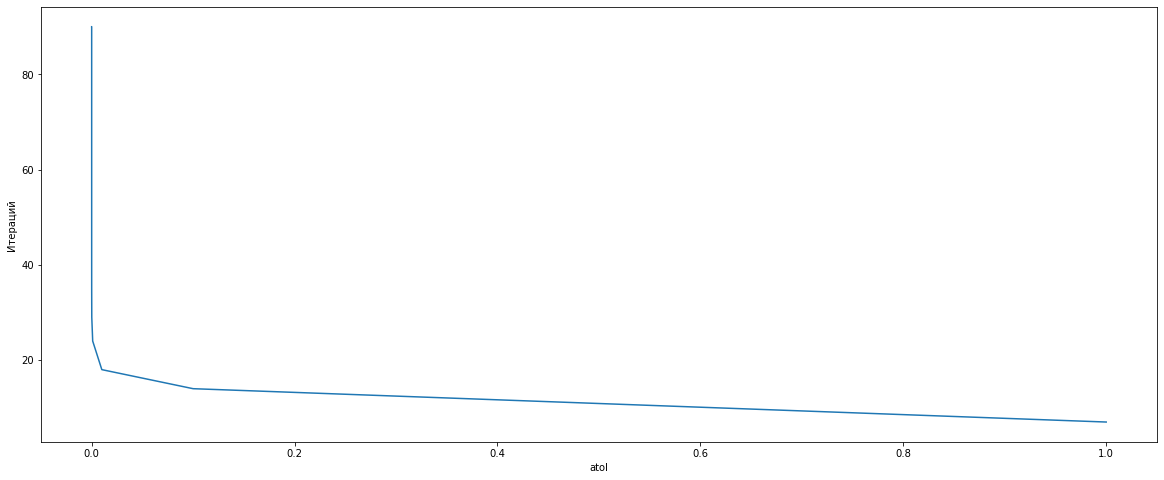

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(am, res)
plt.xlabel('atol')
plt.ylabel('Итераций')
plt.show()

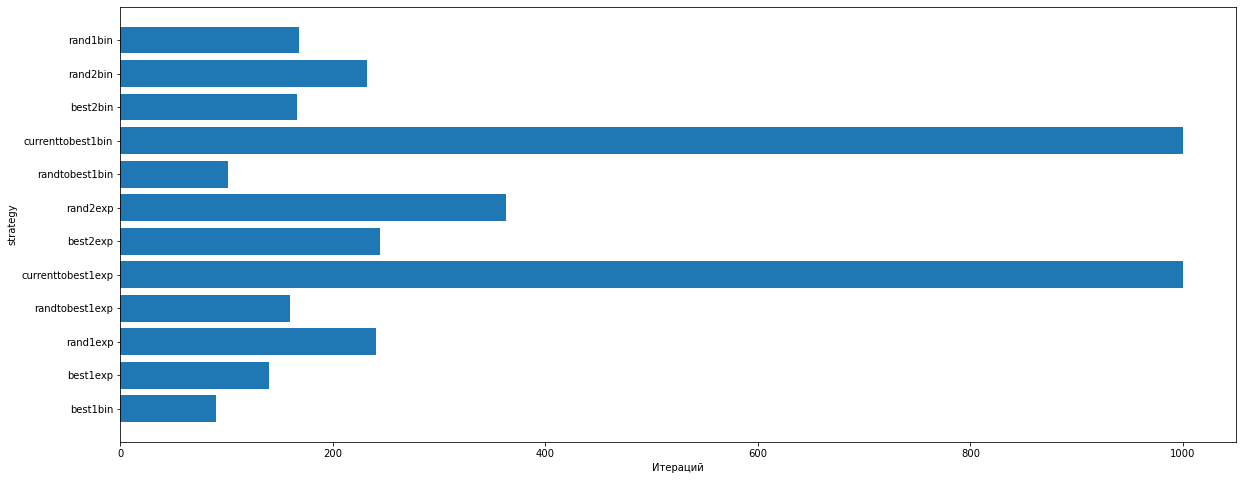

In [20]:
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp',
            'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
res = []
for i in strategy:
    res.append(differential_evolution(ackley, bounds, strategy=i, seed=42)['nit'])
    
plt.figure(figsize=(20,8))    
plt.barh(strategy, res)
plt.xlabel('Итераций')
plt.ylabel('strategy')
plt.show()

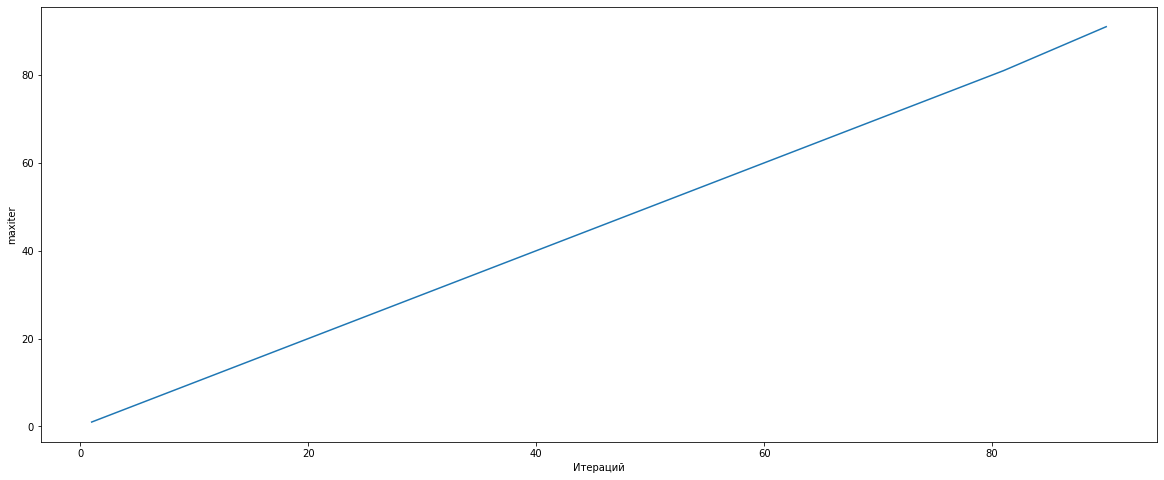

In [21]:
i = 1
res = []
param = []
while i <= 100:
    res.append(differential_evolution(ackley, bounds, maxiter=i, seed=42)['nit'])
    param.append(i)
    i = i+10
    
plt.figure(figsize=(20,8))    
plt.plot(res, param)
plt.xlabel('Итераций')
plt.ylabel('maxiter')
plt.show()

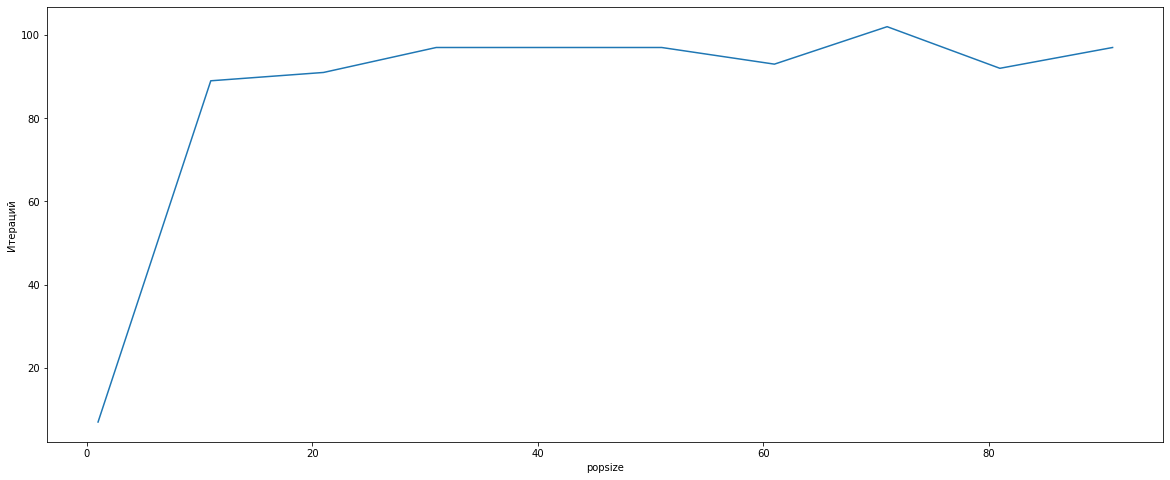

In [23]:
i = 1
res = []
param = []
while i <= 100:
    res.append(differential_evolution(ackley, bounds, popsize=i, seed=42)['nit'])
    param.append(i)
    i = i+10
    
plt.figure(figsize=(20,8))    
plt.plot(param, res)
plt.ylabel('Итераций')
plt.xlabel('popsize')
plt.show()

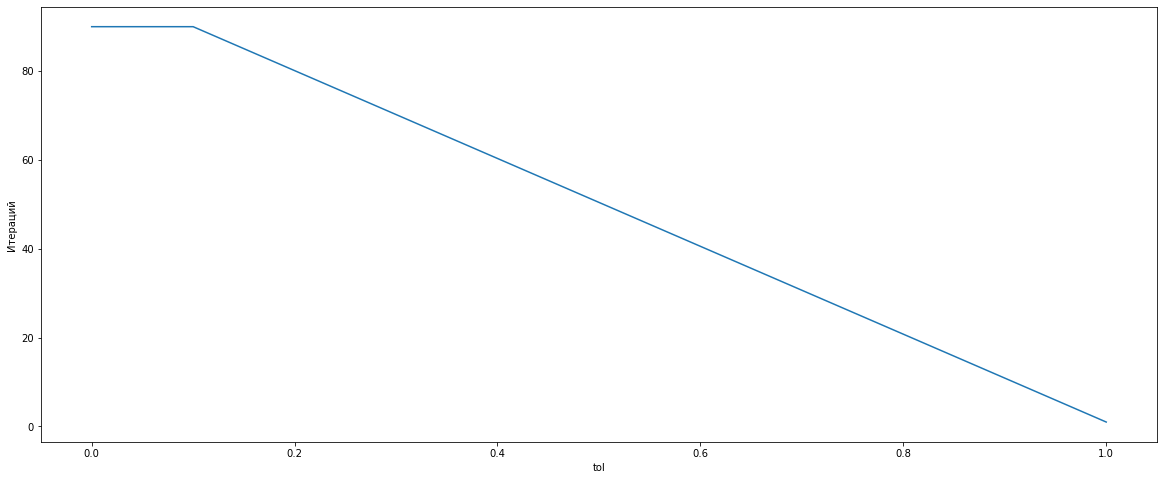

In [32]:
i = 1
a = 1
res = []
param = []
while i <= 10:
    res.append(differential_evolution(ackley, bounds, tol=a, seed=42)['nit'])
    param.append(a)
    a = a/10
    i += 1
    
plt.figure(figsize=(20,8))    
plt.plot(param, res)
plt.ylabel('Итераций')
plt.xlabel('tol')
plt.show()

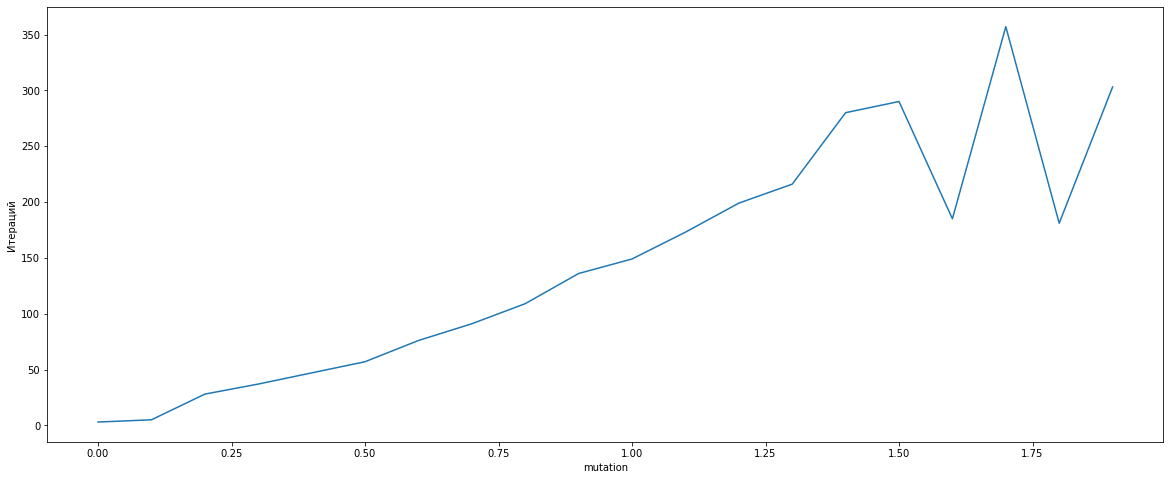

In [35]:
i = 0
res = []
param = []
while i <= 2:
    res.append(differential_evolution(ackley, bounds, mutation=i, seed=42)['nit'])
    param.append(i)
    i += 0.1
    
plt.figure(figsize=(20,8))    
plt.plot(param, res)
plt.ylabel('Итераций')
plt.xlabel('mutation')
plt.show()

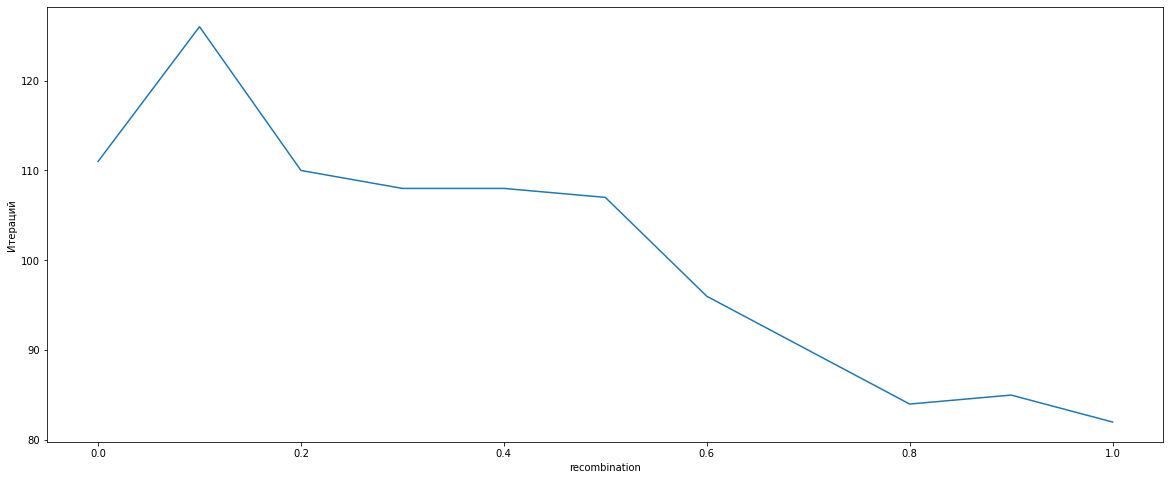

In [36]:
i = 0
res = []
param = []
while i <= 1:
    res.append(differential_evolution(ackley, bounds, recombination=i, seed=42)['nit'])
    param.append(i)
    i += 0.1
    
plt.figure(figsize=(20,8))    
plt.plot(param, res)
plt.ylabel('Итераций')
plt.xlabel('recombination')
plt.show()

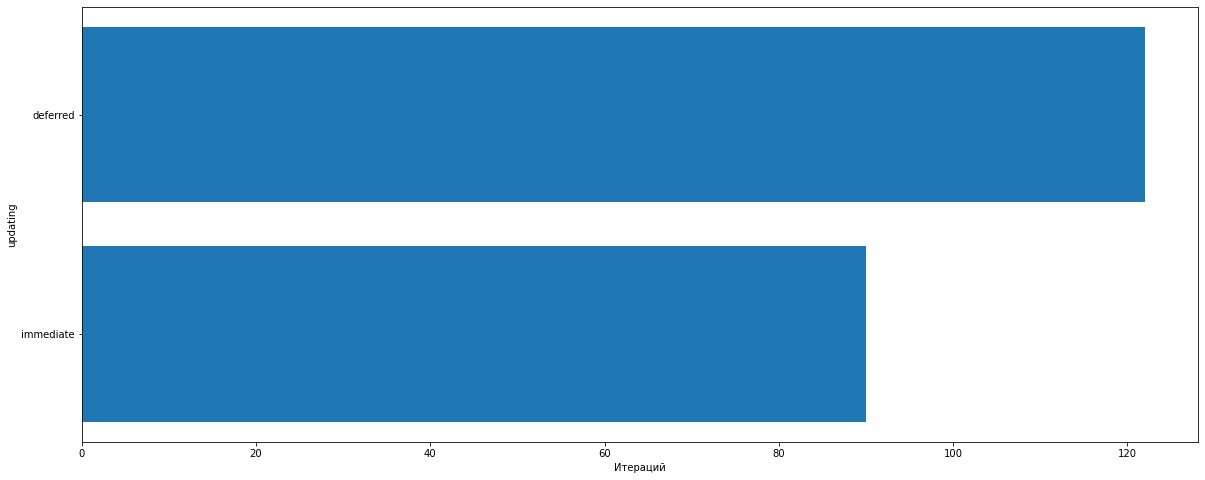

In [38]:
updating = ['immediate', 'deferred']
res = []
for i in updating:
    res.append(differential_evolution(ackley, bounds, updating=i, seed=42)['nit'])
    
plt.figure(figsize=(20,8))    
plt.barh(updating, res)
plt.xlabel('Итераций')
plt.ylabel('updating')
plt.show()

In [ ]:
#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.